**Let's Analyz and find following**
* Is there any trend in the sales of all four products during certain months?
* Out of all four products , which product has seen the highest sales in all the given years?
* The company has all it's retail centers closed on the 31st of December every year. Mr: Hariharan , the CEO , would love to get an estimate on no: of units of each product that could be sold on 31st of Dec , every year , if all their retail centers were kept open.
* The CEO is considering an idea to drop the production of any one of the products. He wants you to analyze this data and suggest whether his idea would result in a massive setback for the company. 
* The CEO would also like to predict the sales and revenues for the year 2024. He wants you to give a yearly estimate with the best possible accuracy.



## Load libries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

### Loading Dataset

In [27]:
data = pd.read_csv('statsfinal.csv')

In [28]:
data.head(-1)

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04
...,...,...,...,...,...,...,...,...,...,...
4594,4594,29-01-2023,1227,3044,5510,1896,3889.59,19298.96,29864.20,13518.48
4595,4595,30-01-2023,2476,3419,525,1359,7848.92,21676.46,2845.50,9689.67
4596,4596,31-01-2023,7446,841,4825,1311,23603.82,5331.94,26151.50,9347.43
4597,4597,01-02-2023,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62


In [29]:
data.shape

(4600, 10)

In [30]:
data.columns

Index(['Unnamed: 0', 'Date', 'Q-P1', 'Q-P2', 'Q-P3', 'Q-P4', 'S-P1', 'S-P2',
       'S-P3', 'S-P4'],
      dtype='object')

**Observation**
* column "uamed:0" is having unique key so no use
* data strat from 13-6-2010 and end at 02-02-23 so we have both years incomplete data 
* we have Each products sales and revenve with day,month and year

In [31]:
#droping useless data
data=data.drop(columns=['Unnamed: 0'])

In [32]:
# split data colum so we can drop 2010 and 2023 data for incomplete data
data['Day'] =data['Date'].apply(lambda x:x.split('-')[0])
data['Month']=data['Date'].apply(lambda x:x.split('-')[1])
data['Year']=data['Date'].apply(lambda x:x.split('-')[2])

In [33]:
#droping Data from 2010 and 2023
data = data.drop(index=data[(data['Year'] == '2010') | (data['Year'] == '2023')].index)


In [34]:
data = data.drop(['Date'], axis=1)

In [35]:
data.head(-1)

,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Day,Month,Year
201,281,3956,4186,1537,890.77,25081.04,22688.12,10958.81,01,01,2011
202,7665,1350,4266,1789,24298.05,8559.00,23121.72,12755.57,02,01,2011
203,937,3758,4311,314,2970.29,23825.72,23365.62,2238.82,03,01,2011
204,6378,968,4530,995,20218.26,6137.12,24552.60,7094.35,04,01,2011
205,731,2174,5908,1505,2317.27,13783.16,32021.36,10730.65,05,01,2011
...,...,...,...,...,...,...,...,...,...,...,...
4560,456,2530,3333,570,1445.52,16040.20,18064.86,4064.10,25,12,2022
4561,7600,662,4510,988,24092.00,4197.08,24444.20,7044.44,26,12,2022
4562,7114,2948,681,700,22551.38,18690.32,3691.02,4991.00,27,12,2022
4563,7759,356,1834,1142,24596.03,2257.04,9940.28,8142.46,28,12,2022


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4365 entries, 201 to 4565
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q-P1    4365 non-null   int64  
 1   Q-P2    4365 non-null   int64  
 2   Q-P3    4365 non-null   int64  
 3   Q-P4    4365 non-null   int64  
 4   S-P1    4365 non-null   float64
 5   S-P2    4365 non-null   float64
 6   S-P3    4365 non-null   float64
 7   S-P4    4365 non-null   float64
 8   Day     4365 non-null   object 
 9   Month   4365 non-null   object 
 10  Year    4365 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 409.2+ KB


In [42]:
monthly_sales = data.groupby("Month").agg({"Q-P1": "sum", "Q-P2": "sum", "Q-P3": "sum", "Q-P4": "sum"})

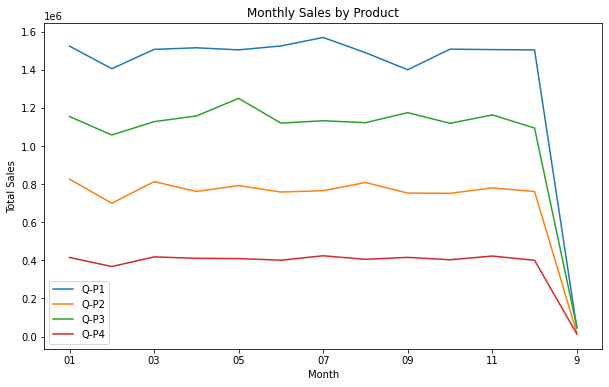

In [38]:
monthly_sales.plot(kind="line", figsize=(10, 6))
plt.title("Monthly Sales by Product")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

In [39]:
data['Month'] = data['Month'].replace('9', '09')

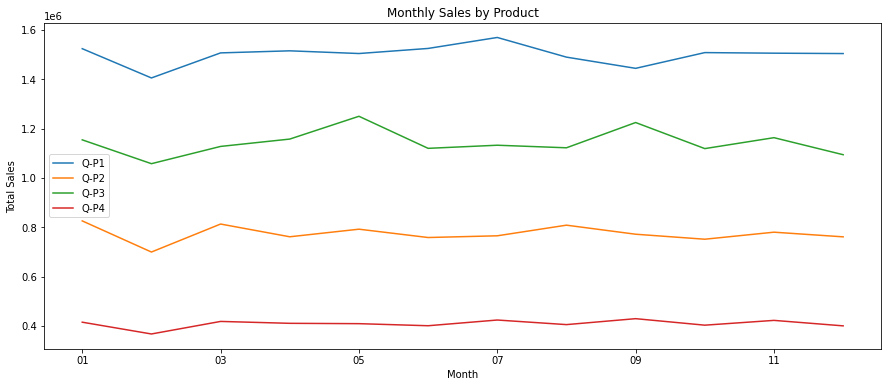

In [47]:
monthly_sales.plot(kind="line", figsize=(15, 6))
plt.title("Monthly Sales by Product")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

there are certain months where we can observe higher unit sales for each of the four products. Specifically, we can observe:

- For P1, the months from March to July have the highest unit sales.
- For P2, the months of January and from March to August have the highest unit sales.
- For P3, the months of May and September have the highest unit sales.
- For P4, we can observe uniform sales throughout the year, with no significant trend observed during any specific month

In [52]:
yearly_sales = data.groupby(['Year']).sum()[['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']]

highest_sales = yearly_sales.idxmax(axis=1)


print('Product with highest sales each year:')
print(highest_sales)


Product with highest sales each year:
Year
2011    Q-P1
2012    Q-P1
2013    Q-P1
2014    Q-P1
2015    Q-P1
2016    Q-P1
2017    Q-P1
2018    Q-P1
2019    Q-P1
2020    Q-P1
2021    Q-P1
2022    Q-P1
dtype: object


In [53]:
yearly_rev = data.groupby(['Year']).sum()[['S-P1', 'S-P2', 'S-P3', 'S-P4']]
highest_rev = yearly_rev.idxmax(axis=1)

print('Product with highest revenu each year:')
print(highest_rev)

Product with highest revenu each year:
Year
2011    S-P3
2012    S-P3
2013    S-P3
2014    S-P3
2015    S-P3
2016    S-P3
2017    S-P3
2018    S-P3
2019    S-P3
2020    S-P3
2021    S-P3
2022    S-P3
dtype: object


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4365 entries, 201 to 4565
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q-P1    4365 non-null   int64  
 1   Q-P2    4365 non-null   int64  
 2   Q-P3    4365 non-null   int64  
 3   Q-P4    4365 non-null   int64  
 4   S-P1    4365 non-null   float64
 5   S-P2    4365 non-null   float64
 6   S-P3    4365 non-null   float64
 7   S-P4    4365 non-null   float64
 8   Day     4365 non-null   object 
 9   Month   4365 non-null   object 
 10  Year    4365 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 409.2+ KB


In [ ]:
# Subset the original dataframe to include only data for December 31st of each year
dec_31_data = sales_data[sales_data['Date'].str.endswith('12-31')]

# Calculate the average number of units sold for each product on December 31st
avg_units_sold_p1 = dec_31_data['Q-P1'].mean()
avg_units_sold_p2 = dec_31_data['Q-P2'].mean()
avg_units_sold_p3 = dec_31_data['Q-P3'].mean()
avg_units_sold_p4 = dec_31_data['Q-P4'].mean()

# Print the estimated number of units sold for each product on December 31st
print(f"Estimated number of units sold on December 31st for each product:")
print(f"P1: {avg_units_sold_p1:.2f}")
print(f"P2: {avg_units_sold_p2:.2f}")
print(f"P3: {avg_units_sold_p3:.2f}")
print(f"P4: {avg_units_sold_p4:.2f}")


In [48]:
data['Total Sales'] = data['Q-P1'] + data['Q-P2'] + data['Q-P3'] + data['Q-P4']
data['Total Revenue'] = data['S-P1'] + data['S-P2'] + data['S-P4'] + data['S-P4']

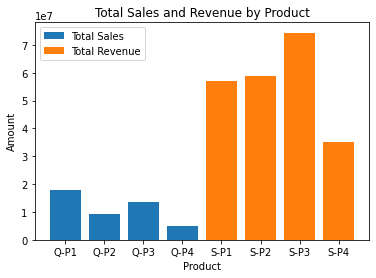

In [49]:
# bar chart of total sales and revenue by product
product_sales = data[['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']].sum()
product_revenue = data[['S-P1', 'S-P2', 'S-P3', 'S-P4']].sum()
plt.bar(['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4'], product_sales, label='Total Sales')
plt.bar(['S-P1', 'S-P2', 'S-P3', 'S-P4'], product_revenue, label='Total Revenue')
plt.legend()
plt.xlabel('Product')
plt.ylabel('Amount')
plt.title('Total Sales and Revenue by Product')
plt.show()

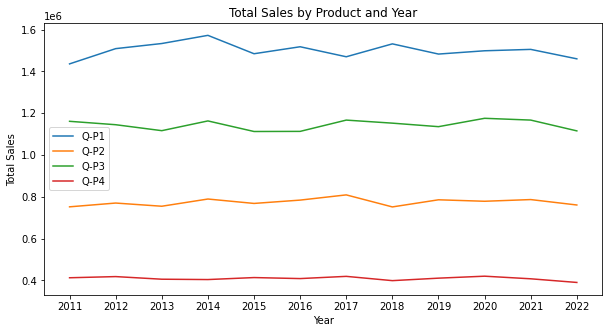

In [50]:
fig, ax = plt.subplots(figsize=(10, 5))

# iterate over each product and plot its total sales by year
for product in ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']:
    product_sales = data.groupby('Year')[f'Q-P{product[-1]}'].sum()
    ax.plot(product_sales.index, product_sales.values, label=product)

ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales by Product and Year')

plt.show()

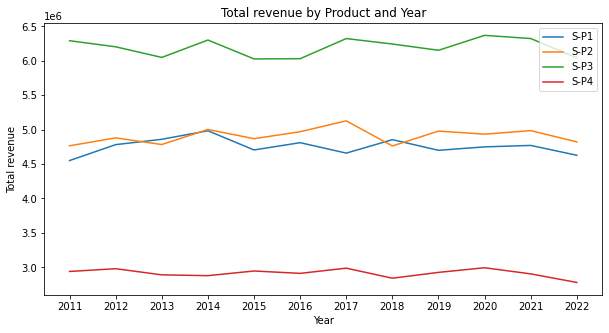

In [51]:
fig, ax = plt.subplots(figsize=(10, 5))

# iterate over each product and plot its total revenue by year
for product in ['S-P1', 'S-P2', 'S-P3', 'S-P4']:
    product_sales = data.groupby('Year')[f'S-P{product[-1]}'].sum()
    ax.plot(product_sales.index, product_sales.values, label=product)

ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Total revenue')
ax.set_title('Total revenue by Product and Year')

plt.show()

In [52]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4365 entries, 201 to 4565
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           4365 non-null   object 
 1   Q-P1           4365 non-null   int64  
 2   Q-P2           4365 non-null   int64  
 3   Q-P3           4365 non-null   int64  
 4   Q-P4           4365 non-null   int64  
 5   S-P1           4365 non-null   float64
 6   S-P2           4365 non-null   float64
 7   S-P3           4365 non-null   float64
 8   S-P4           4365 non-null   float64
 9   Day            4365 non-null   object 
 10  Month          4365 non-null   object 
 11  Year           4365 non-null   object 
 12  Total Sales    4365 non-null   int64  
 13  Total Revenue  4365 non-null   float64
dtypes: float64(5), int64(5), object(4)
memory usage: 511.5+ KB


In [53]:
data = data.drop(['Date', 'Day', 'Month','Year'], axis=1)

In [54]:
data = data.astype('float32')

In [55]:
# Split the data
X = data.drop(['Total Sales', 'Total Revenue'], axis=1)
y_sales = data['Total Sales']
y_revenue = data['Total Revenue']
X_train, X_test, y_sales_train, y_sales_test, y_revenue_train, y_revenue_test = train_test_split(X, y_sales, y_revenue, test_size=0.2, random_state=42)


In [56]:
# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [57]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_sales_train, epochs=100, validation_data=(X_test, y_sales_test))

# Evaluate the model
accuracy = model.evaluate(X_test, y_sales_test)
print('Accuracy:', accuracy)



Epoch 1/100
110/110 [==============================] - 1s 5ms/step - loss: 119039344.0000 - val_loss: 120038144.0000
Epoch 2/100
110/110 [==============================] - 1s 5ms/step - loss: 114023128.0000 - val_loss: 109027376.0000
Epoch 3/100
110/110 [==============================] - 0s 4ms/step - loss: 94804976.0000 - val_loss: 80440848.0000
Epoch 4/100
110/110 [==============================] - 0s 4ms/step - loss: 60062424.0000 - val_loss: 41208420.0000
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 24557490.0000 - val_loss: 12124832.0000
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 6056086.5000 - val_loss: 2821130.2500
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 1982273.2500 - val_loss: 1653466.3750
Epoch 8/100
110/110 [==============================] - 0s 3ms/step - loss: 1562635.6250 - val_loss: 1487435.2500
Epoch 9/100
110/110 [==============================] - 0s 4ms/step - loss: 1439758

In [58]:
# Predict sales for 2024
sales_2024 = model.predict([[1, 1, 1, 1, 0.2, 0.4, 0.6, 0.8]]) # provide the relevant input features for the year 2024
print('Sales for 2024:', sales_2024)

# Predict revenue for 2024
revenue_2024 = model.predict([[1, 1, 1, 1, 0.2, 0.4, 0.6, 0.8]]) * y_revenue.mean() # provide the relevant input features for the year 2024 and multiply by the average revenue
print('Revenue for 2024:', revenue_2024)

1/1 [==============================] - 0s 187ms/step
Sales for 2024: [[14446.073]]
1/1 [==============================] - 0s 59ms/step
Revenue for 2024: [[6.1524224e+08]]
